In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [5]:
iris_target = iris.target_names

In [6]:
iris_feature_names = iris.feature_names

In [7]:
iris_dataset = iris.data

In [8]:
iris_target

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
iris_feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
iris_dataset.shape

(150, 4)

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
df['target'] = iris.target

In [24]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [28]:
df0.target.unique()

array([0])

In [29]:
df0.shape

(50, 5)

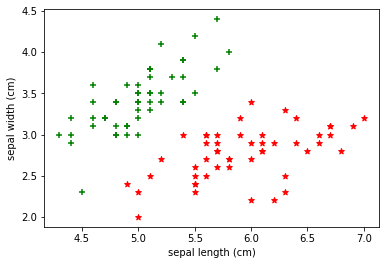

In [38]:
plt.xlabel("sepal length (cm)")
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color= 'green', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'], color='red', marker = '*')
plt.show()

In [40]:
df.shape

(150, 5)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [42]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop(['target'], axis='columns')
y = df.target

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
knn.score(X_test, y_test)

1.0

In [52]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(X_test)

In [53]:
y_predict

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [54]:
#cm = confusion_matrix(truth, prediction)
cm = confusion_matrix(y_test, y_predict)

In [55]:
cm

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]], dtype=int64)

Text(33.0, 0.5, 'Truth')

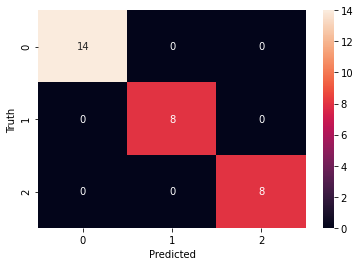

In [57]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

